# 形态学实验——灰度

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def read_txt(path):
    with open(path, 'r') as file:
        lines = file.readlines()
    height = len(lines)
    width = len(lines[0].strip().split(',')) 
    image_data = np.zeros((height, width), dtype=np.uint8)
    for i, line in enumerate(lines):
        numbers = line.strip().split(',')
        image_data[i] = np.array([int(num) for num in numbers])
    return image_data * 255

def vis(image_data):
    # image_data = image_data * 255
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')  # 关闭坐标轴
    plt.show()


![第一题](../实验代码/grayvalue_img/第一题.png)

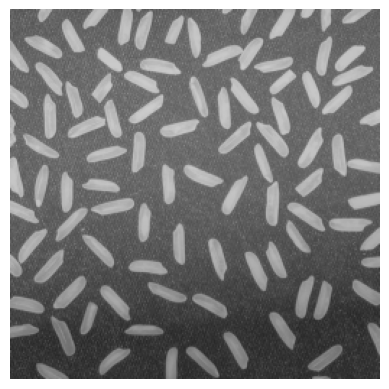

In [56]:
I_0 = cv2.imread(r'..//形态学-灰度/rice.png',cv2.IMREAD_COLOR)
vis(I_0)

![第二题](../实验代码/grayvalue_img/第二题(a).png)

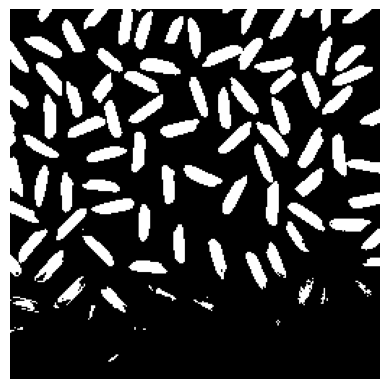

In [57]:
_, I_0_th = cv2.threshold(I_0, 150, 255, cv2.THRESH_BINARY)
vis(I_0_th)

不均匀背景的固定阈值二值分割可能会导致前景和背景的混淆，分割效果变差。

![第二题b](../实验代码/grayvalue_img/第二题(b).png)

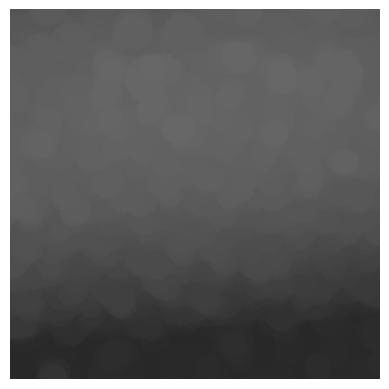

In [58]:
se_1 = read_txt(r'../形态学-灰度/se_1.txt')
I_0_B1 = cv2.morphologyEx(I_0, cv2.MORPH_OPEN, se_1)
vis(I_0_B1)

![第二题c](../实验代码/grayvalue_img/第二题(c).png)

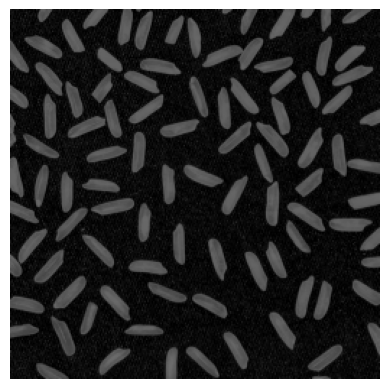

不存在负值，开运算的结果始终小于或等于原始图像的像素值


In [59]:
# I_tophat = cv2.morphologyEx(I_0, cv2.MORPH_TOPHAT, se_1)
I_tophat = I_0 - I_0_B1
vis(I_tophat)
if np.min(I_tophat) >= 0:
    print('不存在负值，开运算的结果始终小于或等于原始图像的像素值')


![第二题(d)](../实验代码/grayvalue_img/第二题(d).png)

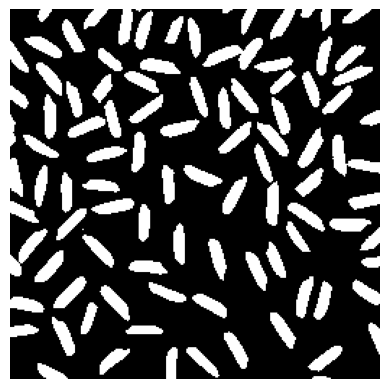

图片下半部分区域的前景物体完整度明显提高，不均匀背景已去除


In [60]:
_, I_tophat_th = cv2.threshold(I_tophat, 60, 255, cv2.THRESH_BINARY)
vis(I_tophat_th)
print('图片下半部分区域的前景物体完整度明显提高，不均匀背景已去除')

![第二题(e)](../实验代码/grayvalue_img/第二题(e).png)

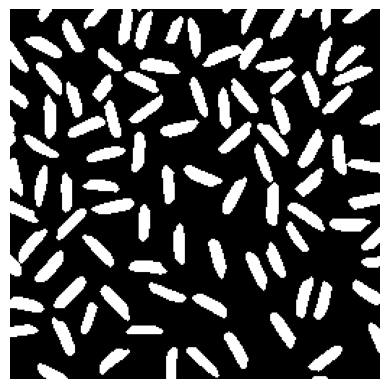

In [61]:
se_2 = read_txt(r'../形态学-灰度/se_2.txt')
I_tophat_th_open = cv2.morphologyEx(I_tophat_th, cv2.MORPH_OPEN, se_2, borderType=cv2.BORDER_REPLICATE)
vis(I_tophat_th_open)

![第三题(a)](../实验代码/grayvalue_img/第三题(a).png)

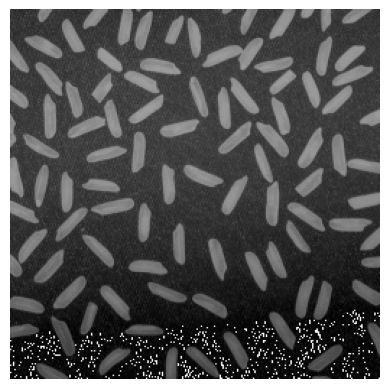

In [62]:
I_marker = I_0 - 45
vis(I_marker)


![第三题(b)](../实验代码/grayvalue_img/第三题(b).png)

52


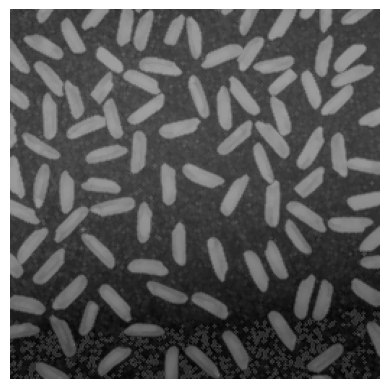

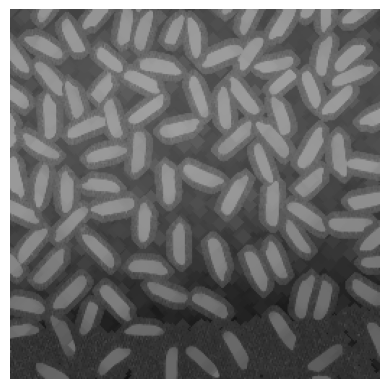

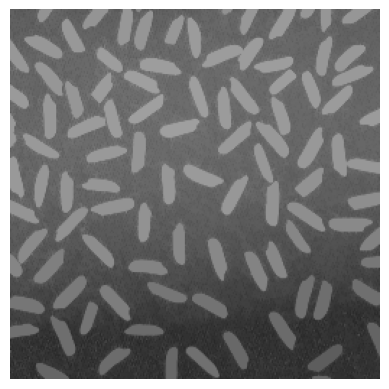

In [63]:
Ir_0 = I_marker

Ir_k = Ir_0.copy()
i = 0
while True:
    result1 = cv2.dilate(Ir_k, se_2, borderType=cv2.BORDER_REPLICATE)
    Ir_k_new = np.minimum(result1, I_0)
    i += 1

    if i == 1:
        Ir_1 = Ir_k_new
    if i == 5:
        Ir_5 = Ir_k_new
    if np.array_equal(Ir_k_new, Ir_k):
        break
    Ir_k = Ir_k_new
Ir_inf = Ir_k
print(i) # 迭代次数52次？

vis(Ir_1)
vis(Ir_5)
vis(Ir_inf)
    



![第三题(c)](../实验代码/grayvalue_img/第三题(c).png)

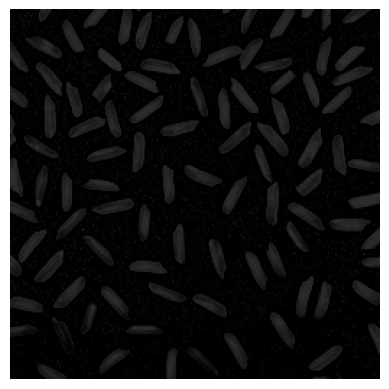

In [64]:
vis(I_0 - Ir_inf)